# Data Sci Eng Methods

## Model Interpretability

### Data Set
NIFTY-50 Stock Market Data (2000 - 2021)
About Dataset
The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 30th April, 2021.

Note: The dataset contains stock data for 50 stocks

Columns:

Date - Trade Data

Symbol - Name of stock

Series - Type of security

Prev Close - Previous data closing price

Open - Opening price for the day

High - Highest price for the day

Low - Lowest price for the day

Last - Last trade price

Closes - Closing price

VWAP - Volume-weighted average price (a ratio of the cumulative share price to the cumulative volume traded over a given time period)

Volume - volume trades for the day

Turnover - The turnover ratio is ratio of sellers to buyers of a stock

Trades - Number of Trades

Deliverable Volume - Amount of deliverable volume

%Deliverble - Percentage of shares that were delivered

Note: All price are in Rupees



### Aim:

*   Fit a linear model and interpret the regression coefficients
*   Fit a tree-based model and interpret the nodes
*   Use auto ml to find the best model
*   Run SHAP analysis on the models
*   Interpret the SHAP values and compare them with the other model interpretability methods




In [ ]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=d8246b2d486ec754457f0268ac17f7993c1bc8e91e38b00e4a6a2e62677c9a67
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=7b3d8e71b131394502188aedba805dc58b57e292370b999519614089ecffc2c2
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import shap
import h2o
from h2o.automl import H2OAutoML
from tpot import TPOTRegressor

In [ ]:
# get dataset
url = "https://raw.githubusercontent.com/ChaudharyAnshul/Model_Interpretability_StockData/main/Dataset/NIFTY50_all.csv"
data = pd.read_csv(url)

In [ ]:
# print the the dataset
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


# Data Processing

In [ ]:
#Print all the Unique stock names
symbol = data["Symbol"].unique()
print(symbol)
print("Unique stock values: ", len(symbol))

['MUNDRAPORT' 'ADANIPORTS' 'ASIANPAINT' 'UTIBANK' 'AXISBANK' 'BAJAJ-AUTO'
 'BAJAJFINSV' 'BAJAUTOFIN' 'BAJFINANCE' 'BHARTI' 'BHARTIARTL' 'BPCL'
 'BRITANNIA' 'CIPLA' 'COALINDIA' 'DRREDDY' 'EICHERMOT' 'GAIL' 'GRASIM'
 'HCLTECH' 'HDFC' 'HDFCBANK' 'HEROHONDA' 'HEROMOTOCO' 'HINDALC0'
 'HINDALCO' 'HINDLEVER' 'HINDUNILVR' 'ICICIBANK' 'INDUSINDBK' 'INFOSYSTCH'
 'INFY' 'IOC' 'ITC' 'JSWSTL' 'JSWSTEEL' 'KOTAKMAH' 'KOTAKBANK' 'LT' 'M&M'
 'MARUTI' 'NESTLEIND' 'NTPC' 'ONGC' 'POWERGRID' 'RELIANCE' 'SBIN'
 'SHREECEM' 'SUNPHARMA' 'TELCO' 'TATAMOTORS' 'TISCO' 'TATASTEEL' 'TCS'
 'TECHM' 'TITAN' 'ULTRACEMCO' 'UNIPHOS' 'UPL' 'SESAGOA' 'SSLT' 'VEDL'
 'WIPRO' 'ZEETELE' 'ZEEL']
Unique stock values:  65


Some of the stock are renamed over time
MUNDRAPORT -> ADANIPORTS

BAJAUTOFIN -> BAJFINANCE

BHARTI -> BHARTIARTL

HINDLEVER -> HINDUNILVR

JSWSTL -> JSWSTEEL

KOTAKMAH -> KOTAKBANK

TELCO -> TATAMOTORS

TISCO -> TATASTEEL

UNIPHOS -> UPL

SESAGOA -> SESAGOA -> VEDL

HINDALC0 -> HINDALCO

In [ ]:
#replacing the values
replace = [
    ["MUNDRAPORT","ADANIPORTS"],
    ["BAJAUTOFIN","BAJFINANCE"],
    ["BHARTI","BHARTIARTL"],
    ["HINDLEVER","HINDUNILVR"],
    ["JSWSTL","JSWSTEEL"],
    ["KOTAKMAH","KOTAKBANK"],
    ["TELCO","TATAMOTORS"],
    ["TISCO","TATASTEEL"],
    ["SESAGOA","VEDL"],
    ["SESAGOA","VEDL"],
    ["HINDALC0","HINDALCO"],
    ["UNIPHOS","UPL"],
]
for i in replace:
    data.loc[ data["Symbol"] == i[0], "Symbol"] = i[1]

In [ ]:
# replace null values with 0
data["Trades"].fillna(0, inplace = True)
data["Deliverable Volume"].fillna(0, inplace = True)
data["%Deliverble"].fillna(0, inplace = True)

In [ ]:
# checking if there is still any null values
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
# since the dataset contains 50 stock we are selecting ADANIPORTS for this Assignment

# ADANIPORTS
data_ap = data.loc[ data["Symbol"] == "ADANIPORTS"]

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

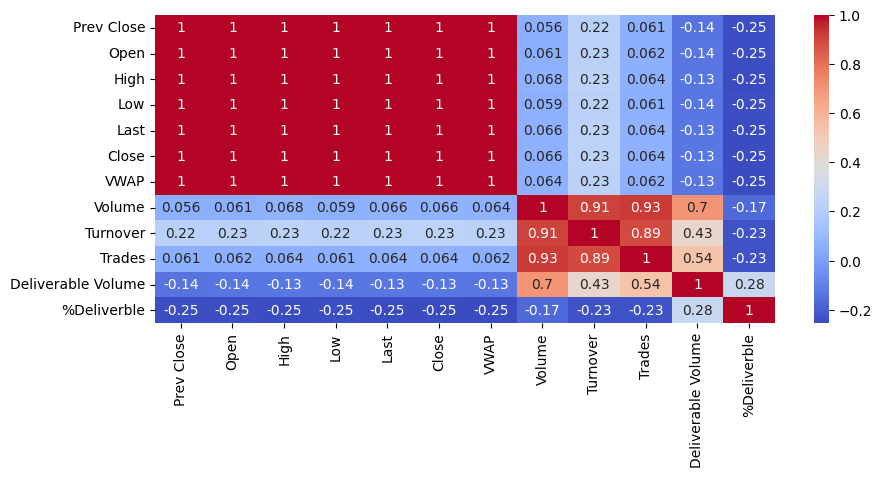

In [ ]:
# Plot a head map to get features to predict the close price
corr = data_ap.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")

Based on the above matrix "Prev Close", "Open", "High", "Low", Last", "VWAP" are strongly correlated with the target variable. This indicates a significant relationship with the target.

In [ ]:
# Dependent and Independent variables
X, y = data_ap[['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']], data_ap["Close"]

In [ ]:
# split the data into training and testing for Asianpaints
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# calculate the metrics of model
def evaluate_metric(y_true, y_pred):
    r_squared = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print("R-squared (R2 Score):", r_squared)
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)

# Linear Regression

In [ ]:
# Add a constant term to the predictor variable for the intercept
preprocessed_X_train = sm.add_constant(X_train)

# Fit the linear regression model
model_reg = sm.OLS(y_train, preprocessed_X_train).fit()

In [ ]:
# R-squared and Adjusted R-squared on model
print("R-squared:", model_reg.rsquared)
print("Adjusted R-squared:", model_reg.rsquared_adj)

R-squared: 0.9999455419297076
Adjusted R-squared: 0.9999454186284165


In [ ]:
# F-statistic and p-value on model
print("F-statistic:", model_reg.fvalue)
print("p-value:", model_reg.f_pvalue)

F-statistic: 8109773.482266176
p-value: 0.0


Inference:

* The R-squared and Adjusted R-squared close to  1.0 signifies an almost perfect fit of the model to the data, explaining all the variability in the 'Close' values.
* A higher F-statistic with a low associated p-value suggests that at least one predictor variable has a significant effect on the dependent variable.

In [ ]:
# Interpret regression coefficients
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.110e+06
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:25:48   Log-Likelihood:                -4691.3
No. Observations:                2657   AIC:                             9397.
Df Residuals:                    2650   BIC:                             9438.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2210      0.057      3.872      0.000       0.109       0.333
Prev Close    -0.0004      0.002     -0.235      0.814      -0.004       0.003
Open          -0.0294      0.005     -6.093      0.000      -0.039      -0.020
High          -0.0494      0.007     -7.170      0.000      -0.063      -0.036
Low            0.0168      0.006      2.793      0.005       0.005       0.029
Last           0.8380      0.006    144.755      0.000       0.827       0.849
VWAP           0.2247      0.011     20.968      0.000       0.204       0.246
==============================================================================
Omnibus:                     1259.571   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112743.474
Skew:                          -1.323   Prob(JB):                         0.00
Kurtosis:                      34.802   Cond. No.                     2.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inference:

* All predictor variables ('Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP') appear to have statistical significance (p-value < 0.05), except 'Prev Close' (p-value > 0.05)
* The "Last" Variable has the most significant impact on the dependent variable. 'Last' has a coefficient of 0.8380, suggesting that a one-unit increase in the 'Last' variable corresponds to an increase of approximately 0.8380 units in the 'Close' variable



In [ ]:
# Evaluate Linear Regression on test data
preprocessed_X_test = sm.add_constant(X_test)
y_pred_lr = model_reg.predict(preprocessed_X_test)

In [ ]:
# evaluate model
evaluate_metric(y_test, y_pred_lr)

R-squared (R2 Score): 0.999946398106875
Mean Squared Error (MSE): 2.1054504508968215
Mean Absolute Error (MAE): 0.8752685392241909


* The extremely high R-squared value close to 1 indicates an good fit of the regression model to the data, explaining almost all of the variance in the dependent variable.
* Low MSE and low MAE values indicate that, on average, the model's predictions are very close to the actual values, suggesting high accuracy in predicting the dependent variable.

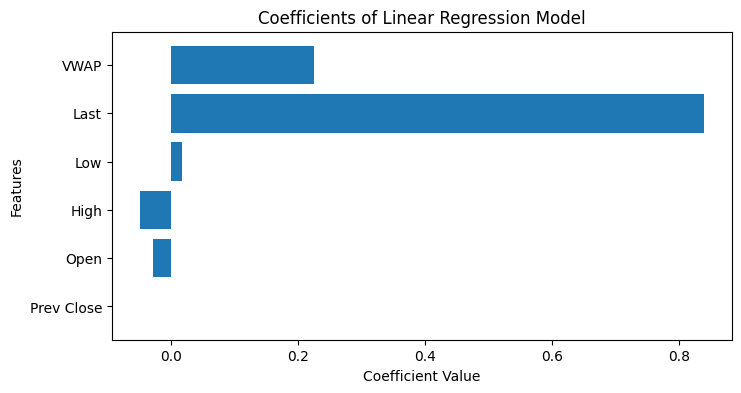

In [ ]:
# Visualize coefficients
coef_values = model_reg.params[1:]  # Exclude intercept
coef_names = X_train.columns.tolist()  # Feature names
plt.figure(figsize=(8, 4))
plt.barh(coef_names, coef_values)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients of Linear Regression Model')
plt.show()

As we saw earlier that "Last" has most impact on the dependent variable and is it confirmed from the graph above.  

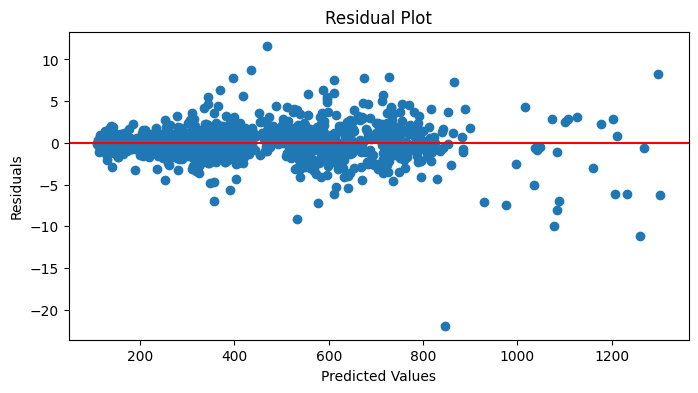

In [ ]:
# Residual analysis
residuals = model_reg.resid
plt.figure(figsize=(8, 4))
plt.scatter(model_reg.predict(), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Inference:

* Residuals centered around zero indicating that on average the model neither consistently overestimates nor underestimates the observed values. There are a few outliers.

# Random Forest

In [ ]:
# Random Forest model
model_tree  = RandomForestRegressor(n_estimators=20, random_state=42)

In [ ]:
# Fit the randomforest model
model_tree.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [ ]:
# Ecaluate Random Forest on test data
y_pred_tree = model_tree.predict(X_test)

In [ ]:
# evaluate model
evaluate_metric(y_test, y_pred_tree)

R-squared (R2 Score): 0.9998124622530472
Mean Squared Error (MSE): 7.3663710526316315
Mean Absolute Error (MAE): 1.1900075187969914


Inference:

* The high R-squared value close to 1 indicates an good fit of the Random Forest model to the data, explaining almost all of the variance in the dependent variable.
* The MSE and MAE values are larger compared to the Regression model indicating that the predicted values are little off from the actual values

In [ ]:
# selecting the first tree
tree_from_forest = model_tree.estimators_[0]

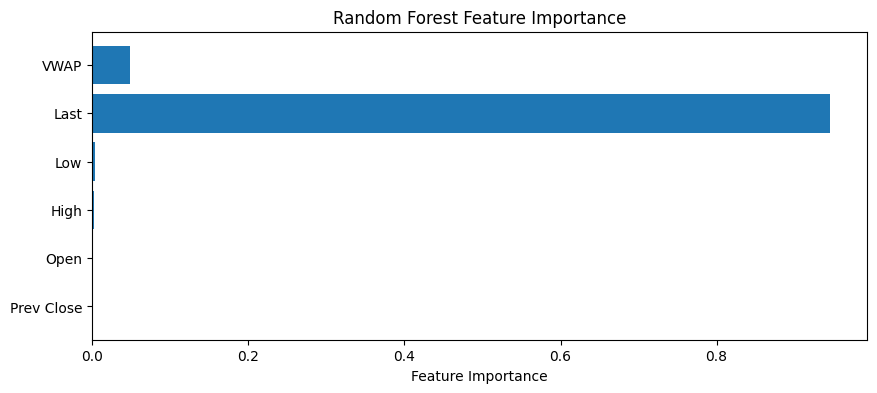

In [ ]:
# Visualize feature importance
feature_importance = model_tree.feature_importances_

plt.figure(figsize=(10, 4))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

inference:

* compared to the linear model the feature importance of Last is very significatnt in Random Forest and rest of the features have little to no impact

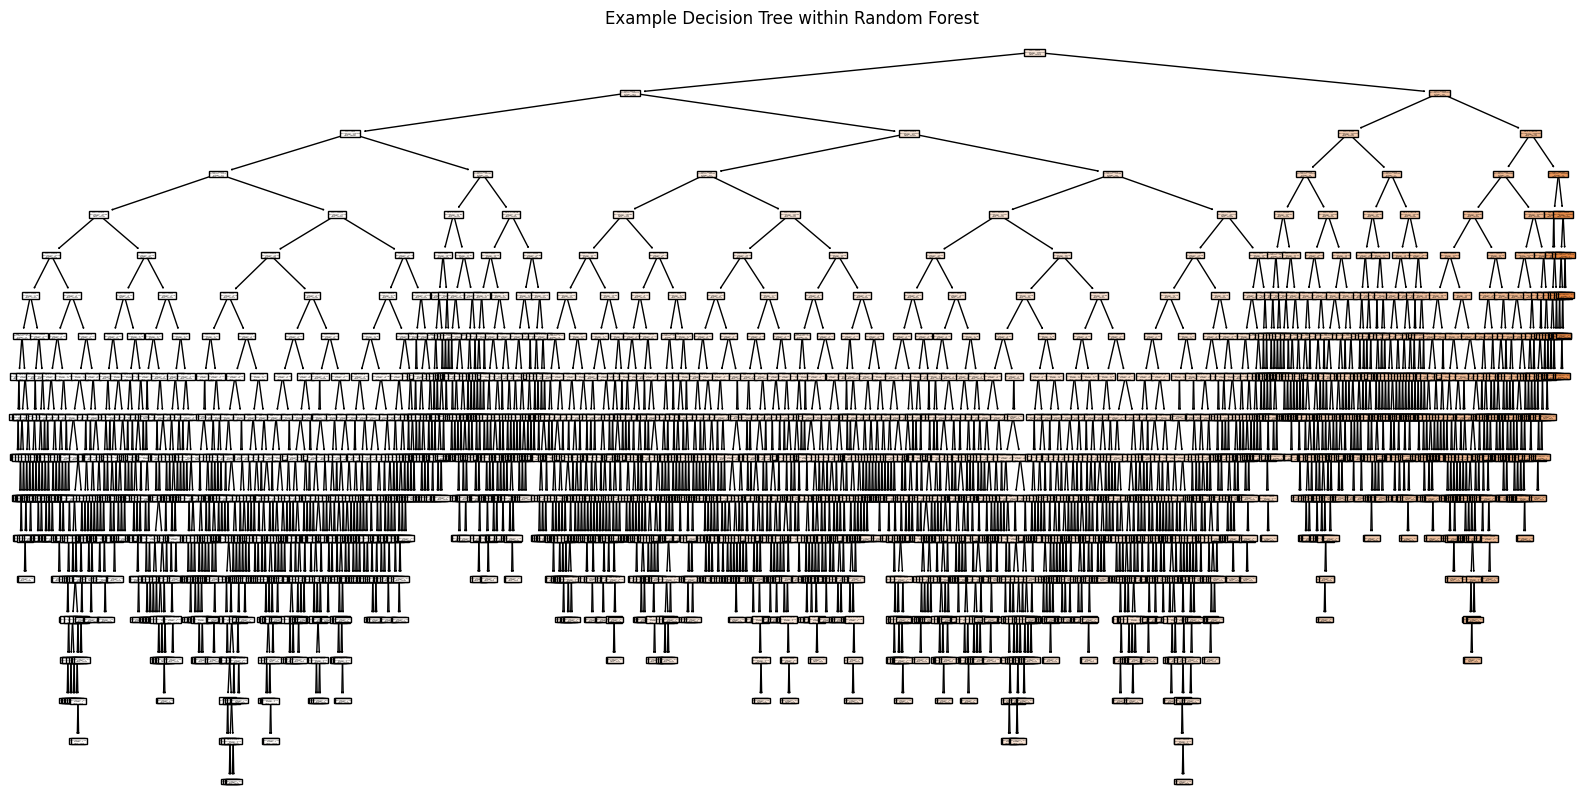

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model_tree.estimators_[0], filled=True, feature_names=X_train.columns)
plt.title("Example Decision Tree within Random Forest")
plt.show()

Tried to print the first decision tree in random forest model but no conclusion can be drawn from the plot

# AutoML to get the best model using h2o

In [ ]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzsv4znro
  JVM stdout: /tmp/tmpzsv4znro/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzsv4znro/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_59ss57
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Convert your pandas DataFrames (X_train, y_train) to H2OFrame
X_h2o = h2o.H2OFrame(X_train)
y_h2o = h2o.H2OFrame(y_train.to_frame())

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Combine X and y into a single H2OFrame
data_h2o = X_h2o.cbind(y_h2o)

In [ ]:
# Identify predictors and response columns
predictors = X_h2o.columns
response = 'Close'

In [ ]:
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", max_runtime_secs=600)

In [ ]:
# Train the model using AutoML
aml.train(x=predictors, y=response, training_frame=data_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_1_20231201_212811


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    92                 92                          129040                 10           10           10            21            167           106.826

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 8.020877913066142
RMSE: 2.832115448400037
MAE: 0.6730953011245354
RMSLE: 0.003134885275944359
Mean Residual Deviance: 8.020877913066142

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 27.342860259511614
RMSE: 5.229040089682964
MAE: 1.5239841733665453
RMSLE: 0.006426512382520496
Mean Residual Deviance: 27.342860259511614

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.51516     0.270054     1.39736       1.40279       1.49667       1.29746       1.9815
mean_residual_deviance  28.1292     28.2349      25.1524       9.81357       12.8482       15.2532       77.5783
mse                     28.1292     28.2349      25.1524       9.81357       12.8482       15.2532       77.5783
r2                      0.999257    0.000704691  0.999324      0.999709      0.999672      0.999553      0.998025
residual_deviance       28.1292     28.2349      25.1524       9.81357       12.8482       15.2532       77.5783
rmse                    4.88914     2.29821      5.01522       3.13266       3.58444       3.90554       8.80786
rmsle                   0.00627317  0.00135859   0.00589131    0.00620646    0.00542786    0.00523469    0.00860552

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-12-01 21:29:10  4.482 sec   0                  191.664          141.911         36734.9
    2023-12-01 21:29:10  4.543 sec   5                  113.432          83.8296         12866.8
    2023-12-01 21:29:10  4.610 sec   10                 67.1469          49.5264         4508.7
    2023-12-01 21:29:10  4.648 sec   15                 39.79            29.2578         1583.25
    2023-12-01 21:29:10  4.683 sec   20                 23.68            17.2925         560.741
    2023-12-01 21:29:10  4.718 sec   25                 14.2342          10.2309         202.613
    2023-12-01 21:29:10  4.754 sec   30                 8.79431          6.07369         77.3398
    2023-12-01 21:29:10  4.788 sec   35                 5.70414          3.66342         32.5372
    2023-12-01 21:29:10  4.824 sec   40                 4.17376          2.30994         17.4202
    2023-12-01 21:29:10  4.860 sec   45                 3.50524          1.55125         12.2867
    2023-12-01 21:29:10  4.894 sec   50                 3.20276          1.12196         10.2577
    2023-12-01 21:29:10  4.932 sec   55                 3.05491          0.900643        9.33245
    2023-12-01 21:29:10  4.963 sec   60                 2.96807          0.791876        8.80942
    2023-12-01 21:29:10  4.994 sec   65                 2.92289          0.745132        8.54328
    2023-12-01 21:29:10  5.035 sec   70                 2.90605          0.719645        8.44514
    2023-12-01 21:29:10  5.084 sec   75                 2.87325          0.702262        8.25555
    2023-12-01 21:29:10  5.124 sec   80                 2.85941          0.694008        8.17624
    2023-12-01 21:29:10  5.154 se

#### The best model given by h2o is Gradient Boosting Machine

In [ ]:
# Get the best model found by AutoML
best_model_h2o = aml.get_best_model()

# SHAP Analysis

### Linear Model

we need to have a scikit model to do shap analysis

In [ ]:
# Convert statsmodels model to scikit-learn-like model

# initialize model
sklearn_model = LinearRegression()

# Assign coefficients
sklearn_model.coef_ = model_reg.params

# Assign intercept
sklearn_model.intercept_ = model_reg.params[0]

sklearn_model

LinearRegression()

sklearn_model - is the model we will use for Shap Analysis

In [ ]:
# SHAP explainer object for LM
explainer_lr  = shap.KernelExplainer(sklearn_model.predict, preprocessed_X_train)
shap_values_lr = explainer_lr.shap_values(preprocessed_X_test)

  0%|          | 0/665 [00:00<?, ?it/s]

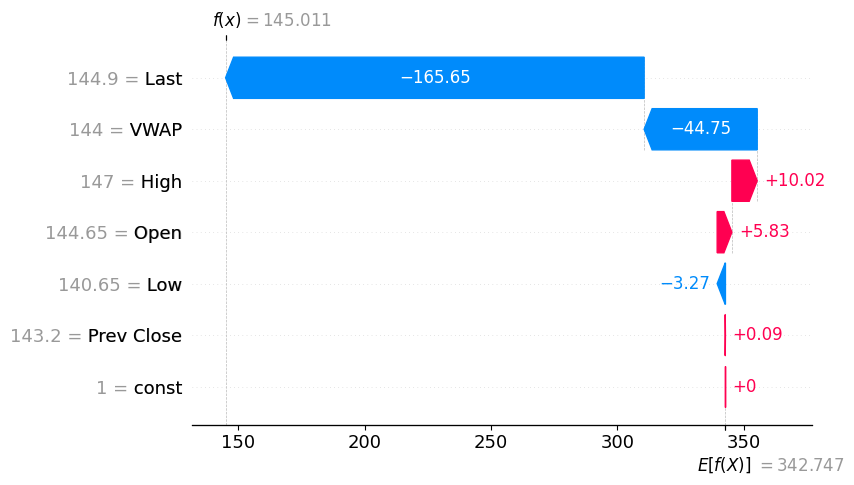

In [ ]:
# Waterfall plot for tree model
shap.waterfall_plot(shap.Explanation(values=shap_values_lr[0], base_values=explainer_lr.expected_value, data=preprocessed_X_test.iloc[0]))

Inference:

* The feature values are represented in the Y axis
* Predicted value for close is 145.011
* The initial prediction is 341.747
* The values in between are the SHAP values where LAst VWAP and Low are negative and High, Open and Prev Close is positive

lets view the Summary and dependency plot to see what make some values negative

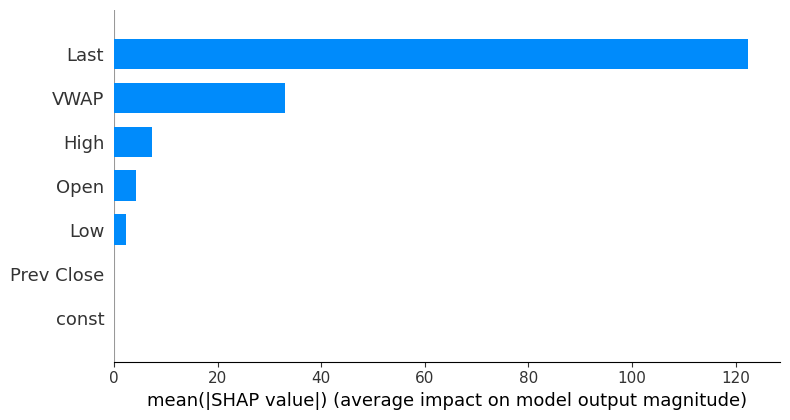

In [65]:
# Bar plot of SHAP values for all features
shap.summary_plot(shap_values_lr, preprocessed_X_test, plot_type="bar")

Inference:

* The features with high Average shap values have made significant contribution in the model (Last, VWAP)
* The values in barplot are the mean of sum(|Shap values|) for each feature

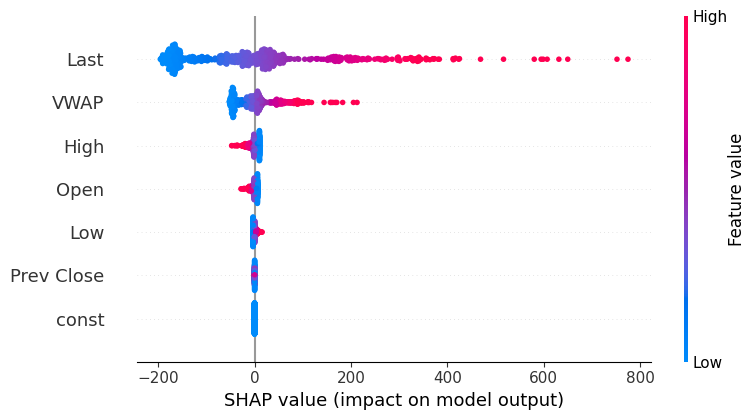

In [ ]:
# Summary plot of SHAP values for all features
shap.summary_plot(shap_values_lr, preprocessed_X_test)

Inference:

* We understand that for low shap values of Last and VWAP the feature values are low as the feature values increases the shap values also increases.
* On the other hand for low shap values of Open and High the feature value is high and with decrease in Feature value the shap value increases.

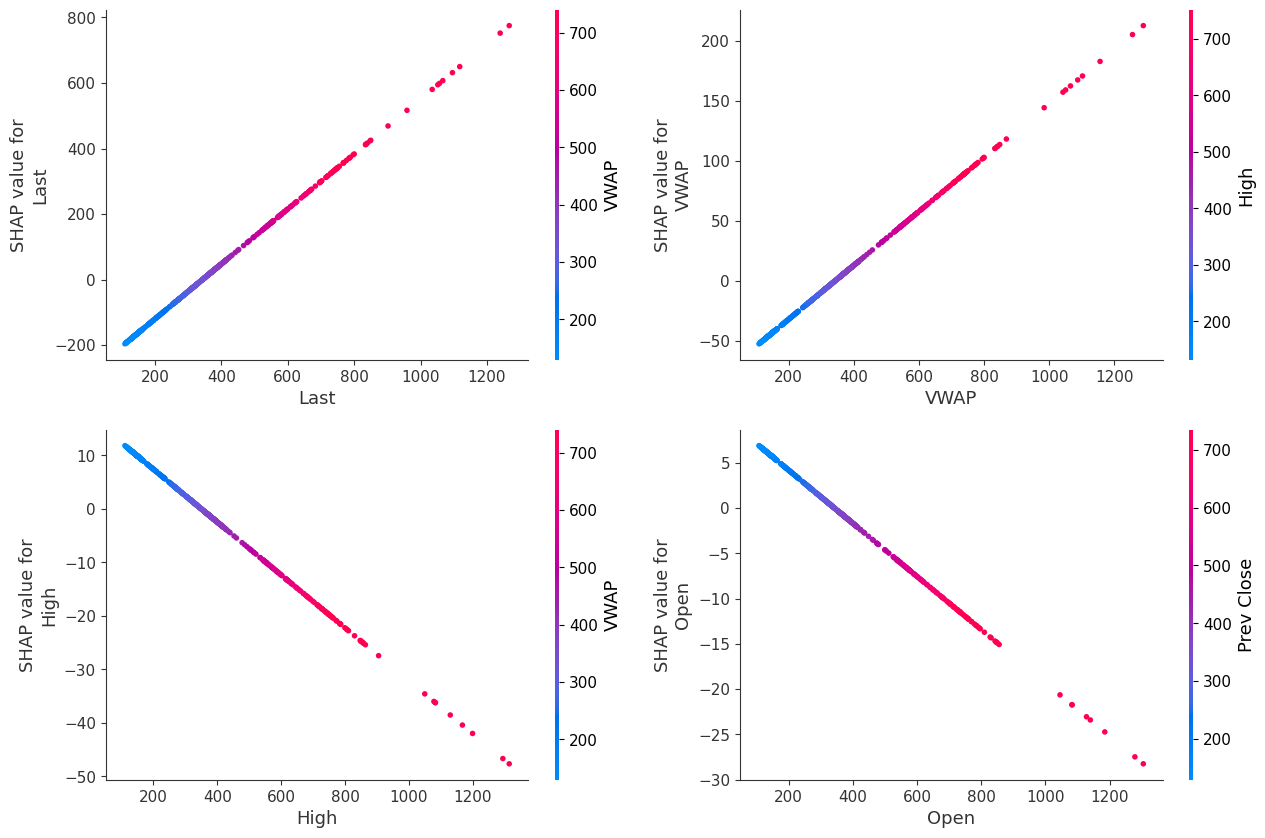

In [ ]:
# Dependence plot for tree model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

shap.dependence_plot("Last", shap_values_lr, preprocessed_X_test, ax=axes[0,0], show=False)

shap.dependence_plot("VWAP", shap_values_lr, preprocessed_X_test, ax=axes[0,1], show=False)

shap.dependence_plot("High", shap_values_lr, preprocessed_X_test, ax=axes[1,0], show=False)

shap.dependence_plot("Open", shap_values_lr, preprocessed_X_test, ax=axes[1,1], show=False)

plt.show()

Inference:

* From the dependency plot we can understand as the Last and VWAP values increase the SHAP value increases hence there is a direct relation.
* For the High and Open Plot we can understannd that as the values increase the SHAP values Decrease hence there is an inverse relation.

## Tree Model

In [ ]:
# SHAP explainer object for tree model
explainer_rf = shap.Explainer(model_tree, X_train)
shap_values_rf = explainer_rf(X_test)

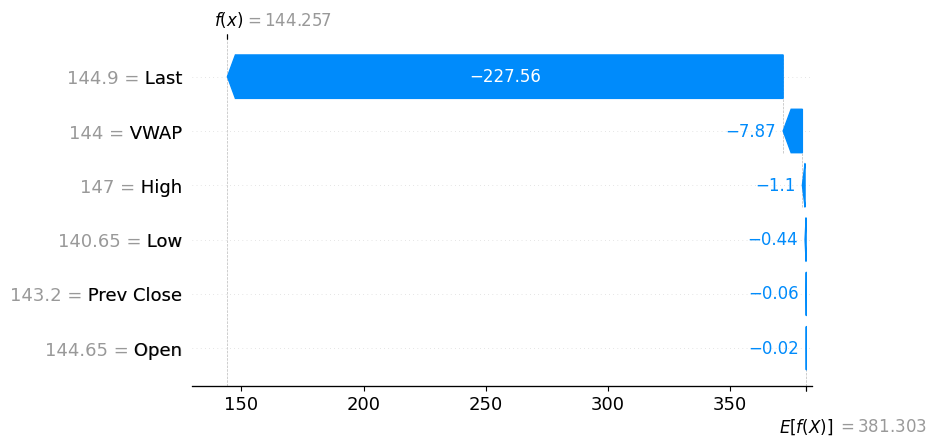

In [ ]:
# Waterfall plot for tree model
shap.waterfall_plot(shap.Explanation(values=shap_values_rf.values[0], base_values=explainer_rf.expected_value, data=X_test.iloc[0]))

Inference:

* The feature values are represented in the Y axis
* Predicted value for close is 144.257
* The initial prediction is 381.303
* The values in between are the SHAP values, where all the values are negative  

lets view the Summary and dependency plot to see what make some values negative

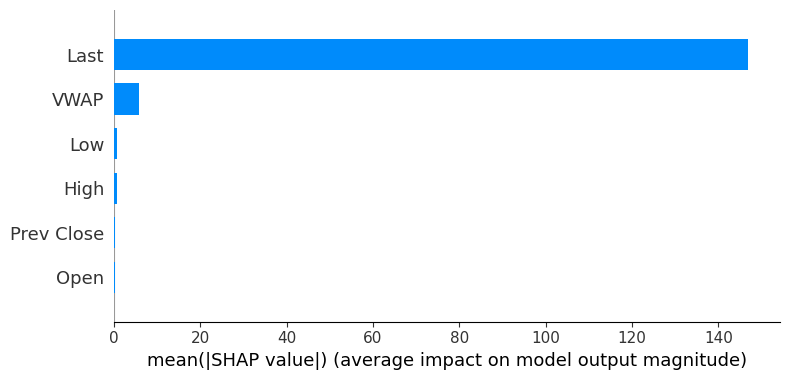

In [67]:
# Bar plot of SHAP values for all features
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")

Inference:

* The features with high Average shap values have made significant contribution in the model (Last)
* The values in barplot are the mean of sum(|Shap values|) for each feature

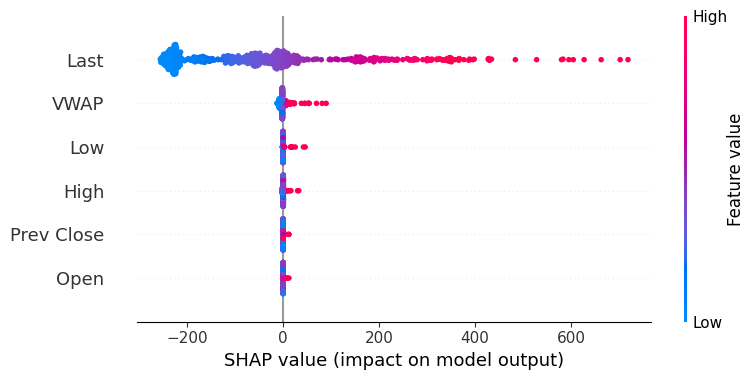

In [ ]:
# Summary plot of SHAP values for all features
shap.summary_plot(shap_values_rf, X_test)

Inference:


* We understand that for low shap values of Last the feature value is low as the feature values increases the shap value also increases.
* For VWPA, Low and High the Shap value are near 0 and increase as the feature value increases.


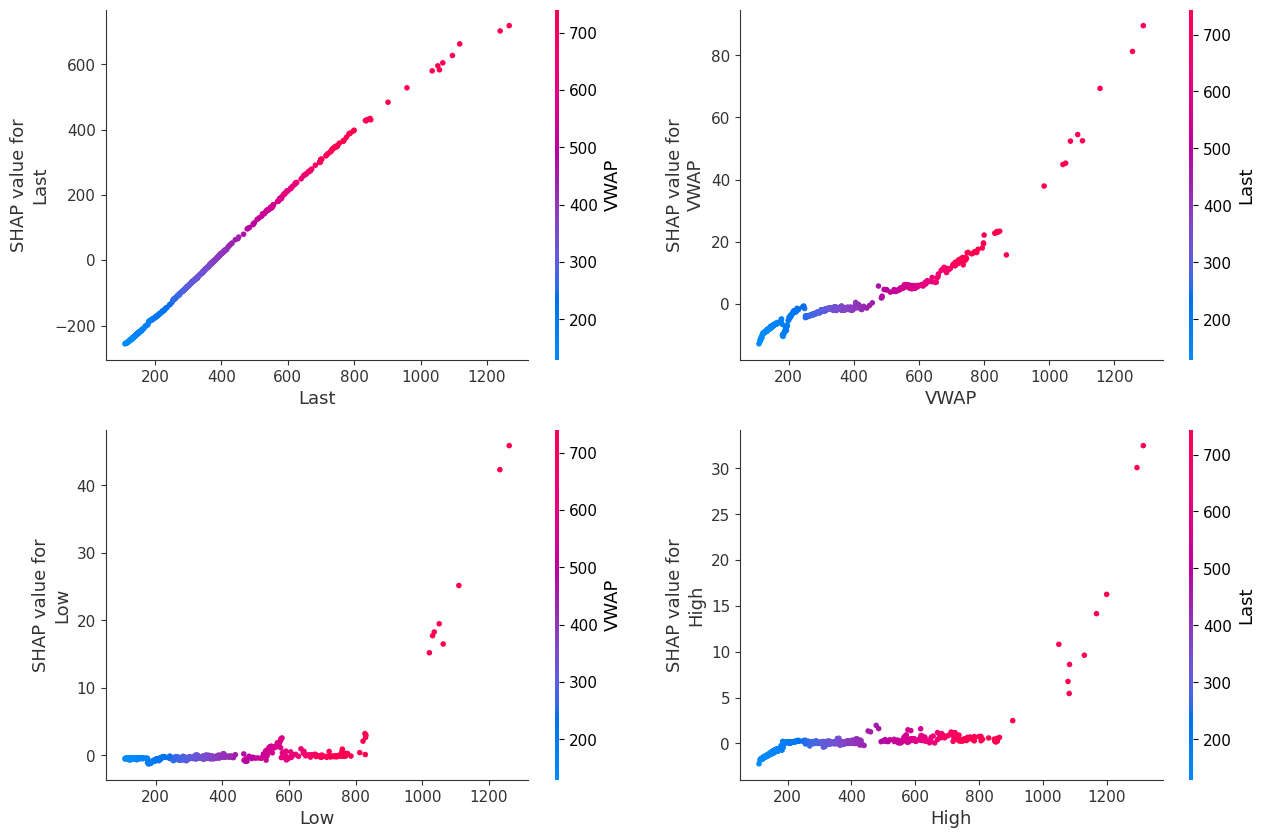

In [ ]:
# Dependence plot for tree model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

shap.dependence_plot("Last", shap_values_rf.values, X_test, ax=axes[0,0], show=False)

shap.dependence_plot("VWAP", shap_values_rf.values, X_test, ax=axes[0,1], show=False)

shap.dependence_plot("Low", shap_values_rf.values, X_test, ax=axes[1,0], show=False)

shap.dependence_plot("High", shap_values_rf.values, X_test, ax=axes[1,1], show=False)

plt.show()

Inference:

* From the dependency plot we can understand as the Last value increase the SHAP value also increases hence there is a direct relation.
* For VWAP there is not a linear increase by as teh value increase the SHAP value also increases.
* For Low and High initially there is no increase in the Shap value but from around 800 the shap value starts to increase.

## AutoMl best Model

### Make a wrapper-class for h2o predictions
* Make predictions corresponding to scikit-learn's format
* This is necessary when using h2o with the SHAP library

In [ ]:
# Wrapper class for h2o
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict(self, X):
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1]

In [ ]:
feature_names = X_test.columns # features
# h2o wrapper object
h2o_wrapper = H2OProbWrapper(best_model_h2o, feature_names)

In [ ]:
# SHAP explainer object for h2o model
explainer_h2o = shap.KernelExplainer(h2o_wrapper.predict, X_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |

███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Shap values for 20 test data
X_test_sample = X_test.iloc[:100]
shap_values_h2o = explainer_h2o.shap_values(X_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

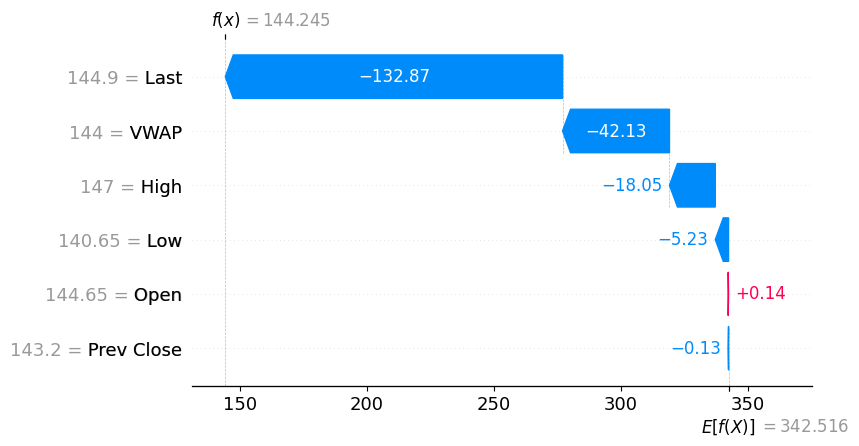

In [ ]:
# Waterfall plot for h2o model
shap.waterfall_plot(shap.Explanation(values=shap_values_h2o[0], base_values=explainer_h2o.expected_value, data=X_test_sample.iloc[0]))

Inference:

* The feature values are represented in the Y axis
* Predicted value for close is 144.245
* The initial prediction is 342.516
* The values in between are the SHAP values, where all the values are negative except Open  

lets view the Summary and dependency plot to see what make some values negative

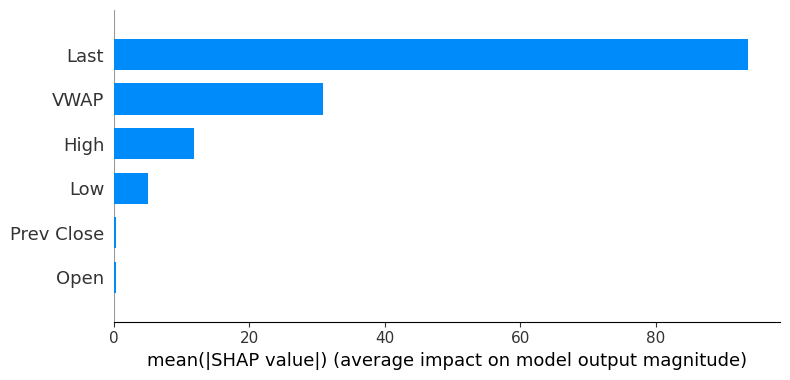

In [68]:
# Summary plot of SHAP values for h2o model
shap.summary_plot(shap_values_h2o, X_test_sample, plot_type="bar")

Inference:

* The features with high Average shap values have made significant contribution in the model (Last, VWAP, High, Low)
* The values in barplot are the mean of sum(|Shap values|) for each feature

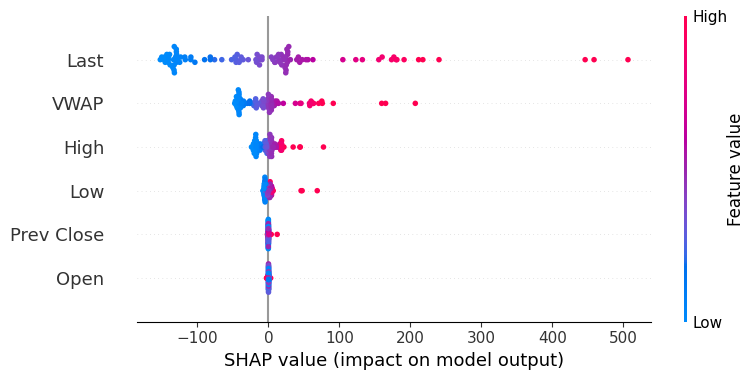

In [ ]:
# Summary plot of SHAP values for h2o model
shap.summary_plot(shap_values_h2o, X_test_sample)

Inference:

* We understand that for low shap values of Last, VWAP High and Low the feature value is low as the feature values increases the shap value also increases.

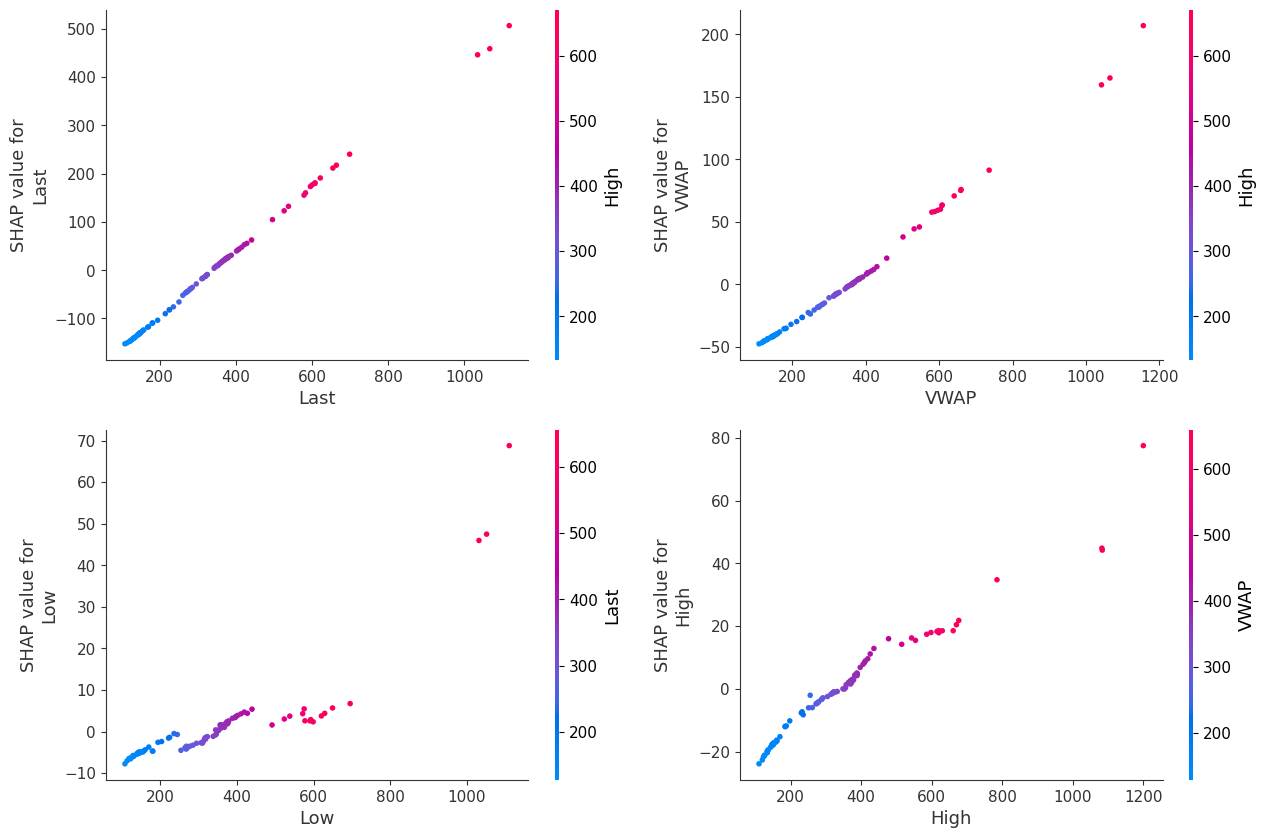

In [ ]:
# Dependence plot for tree model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

shap.dependence_plot("Last", shap_values_h2o, X_test_sample, ax=axes[0,0], show=False)

shap.dependence_plot("VWAP", shap_values_h2o, X_test_sample, ax=axes[0,1], show=False)

shap.dependence_plot("Low", shap_values_h2o, X_test_sample, ax=axes[1,0], show=False)

shap.dependence_plot("High", shap_values_h2o, X_test_sample, ax=axes[1,1], show=False)

plt.show()

Inference:

* From the dependency plot we can understand as the Last and VWAP value increase the SHAP value also increases hence there is a direct relation.
* For Low the is an increase in values but the realtion is not linear
* For High the Shap value increases with feature value the relation is more or less linear with some inconsistancies

# Conclusion

* Performed SHAP analysis on 3 models to better understand how the models are using each feature in determining the predictid value.
* On comparing the values we understand that for the linear model some features had inverse relation with the i.e. when the shap value was increasing the feature value was decreasing
* AutoML's best nodel and Random forest both were tree based models and we colud see that the Shap plots were similar in bot the cases

# References

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

https://shap.readthedocs.io/en/latest/



## MIT License

Copyright (c) 2023 Anshul Chaudhary

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.